# Uniaxial Tensile test UT 4 results
Subtracking of location in loading direction

s0, s1 
s2, s3
s4, s5

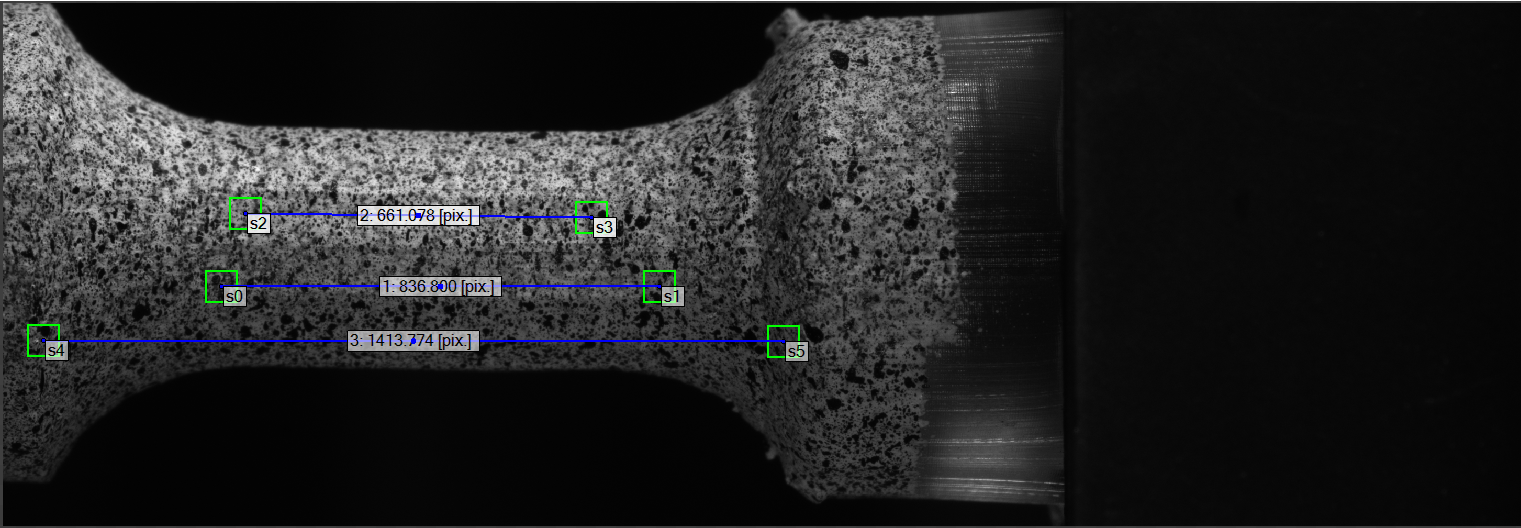

pixel/mm : 445pix/5mm

prøvestykket: 5mm tynneste, 10mm tykkelse, sirkulært prøvestykke
Testen: brudd ved innfestet 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import trapezoid

In [13]:
def locationDisplacement_FromExcel(filename, sheetname):
    Data = pd.read_excel(filename, sheet_name=sheetname)

    frameID = np.array(Data['Frame Id'])

    force = np.array(Data['Force (kN)'])

    s0 = np.array(Data['s0'])
    s1 = np.array(Data['s1'])
    s2 = np.array(Data['s2'])
    s3 = np.array(Data['s3'])
    s4 = np.array(Data['s4'])
    s5 = np.array(Data['s4'])

    return frameID, force, s0, s1, s2, s3, s4, s5

In [14]:
# Function that plots two arrays
def plot_2_arrays(xValues, yValues, xLabel, yLabel, title):
    plt.figure(figsize=(10,6))
    plt.plot(xValues, yValues)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.grid()
    plt.show()

In [15]:
def stress_calc(force, diameter):
    area = np.pi * (diameter/2)**2
    stress = force / area
    return stress

In [16]:
def strain_2_displ(s0, s1):
    length = s1-s0 
    l0 = length[0]
    strain = (length-l0)/l0
    return strain

In [20]:
#defining arrays
frameID, force, s0, s1, s2, s3, s4, s5 = locationDisplacement_FromExcel('UT_4_frame_displ.xlsx', 'UT_4')
#calculating strains
strain1, strain2, strain3 = strain_2_displ(s0, s1), strain_2_displ(s2, s3), strain_2_displ(s4, s5)
#calculating stresses
d=5 #mm
stress1, stress2, stress3 = stress_calc(force, d), stress_calc(force, d), stress_calc(force, d)  

C:\Users\monar\AppData\Local\Temp\ipykernel_12528\2269020290.py:4: RuntimeWarning: invalid value encountered in divide
  strain = (length-l0)/l0


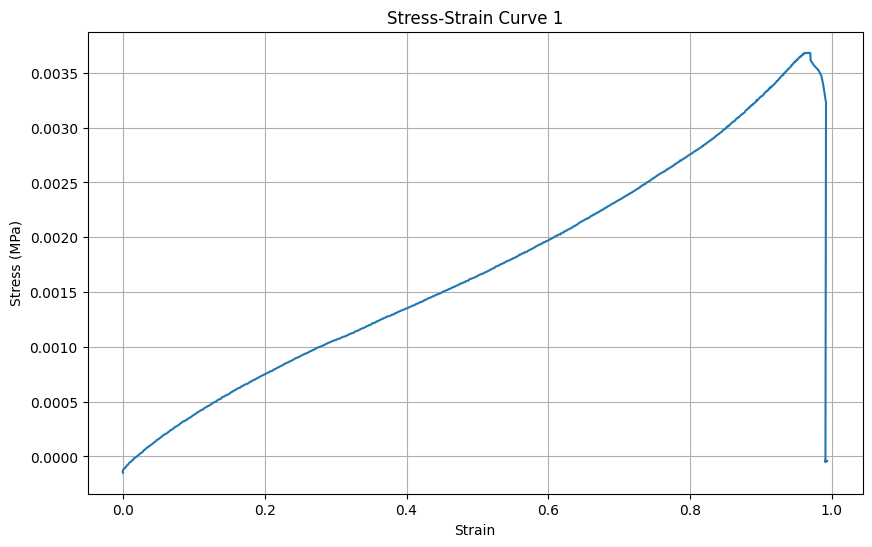

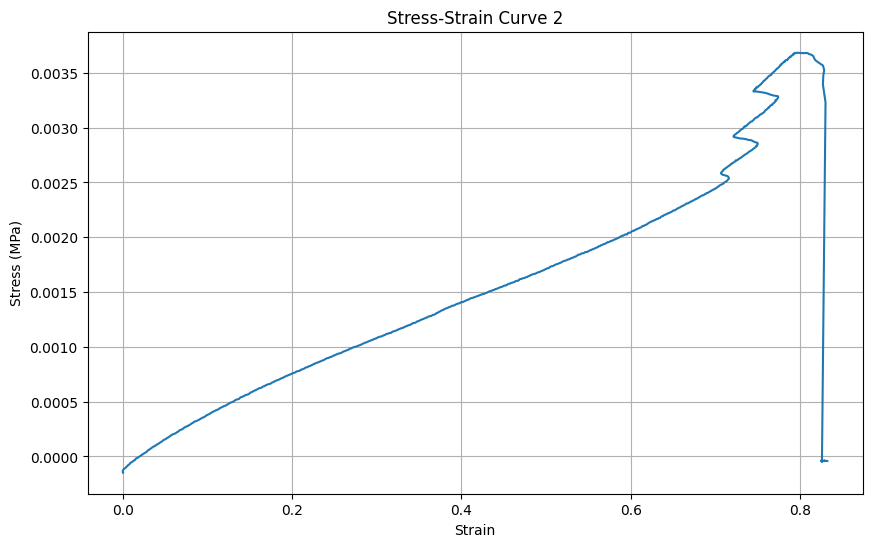

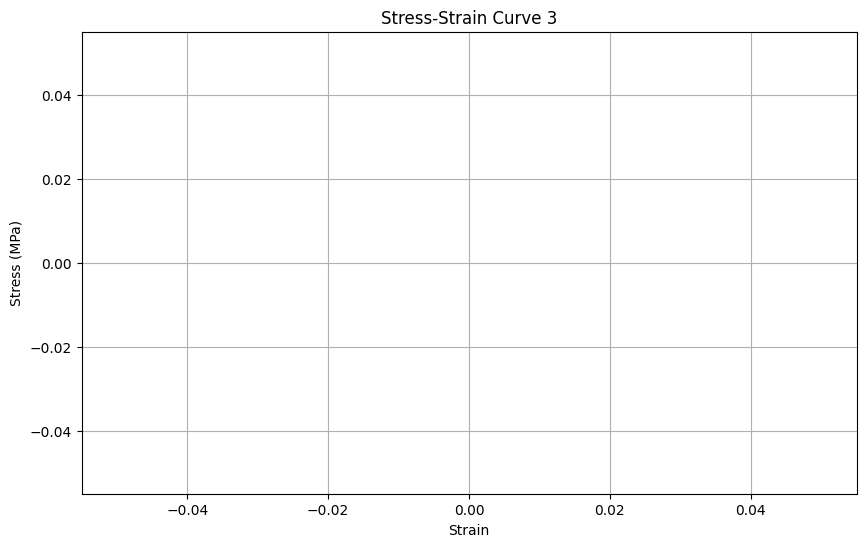

In [21]:
#plotting stress-strain curves
plot_2_arrays(strain1, stress1, 'Strain', 'Stress (MPa)', 'Stress-Strain Curve 1')
plot_2_arrays(strain2, stress2, 'Strain', 'Stress (MPa)', 'Stress-Strain Curve 2')
plot_2_arrays(strain3, stress3, 'Strain', 'Stress (MPa)', 'Stress-Strain Curve 3')